## Load the data

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import os

In [3]:
data = [pd.read_csv(f'/Users/tommasomarrucci/Desktop/IMC BIEF 42/data/round_3/prices_round_3_day_{i}.csv', sep=';') for i in range(0,2)]
trades = [pd.read_csv(f'/Users/tommasomarrucci/Desktop/IMC BIEF 42/data/round_3/trades_round_3_day_{i}.csv', sep=';') for i in range(0,2)]


for i in range(0,2): 
    price_df = data[i]
    prev_df = data[i-1]
    price_df['timestamp'] = price_df['timestamp'] + prev_df['timestamp'].iloc[-1]

data0 = data[1]
data = pd.concat(data).reset_index(drop=True)

data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,999900,VOLCANIC_ROCK_VOUCHER_10500,99.0,19.0,NaN,NaN,NaN,NaN,100,19,NaN,NaN,NaN,NaN,99.5,0.0
1,0,999900,DJEMBES,13493.0,72.0,NaN,NaN,NaN,NaN,13494,72,NaN,NaN,NaN,NaN,13493.5,0.0
2,0,999900,CROISSANTS,4321.0,111.0,NaN,NaN,NaN,NaN,4322,111,NaN,NaN,NaN,NaN,4321.5,0.0
3,0,999900,JAMS,6631.0,210.0,NaN,NaN,NaN,NaN,6633,210,NaN,NaN,NaN,NaN,6632.0,0.0
4,0,999900,VOLCANIC_ROCK_VOUCHER_10000,505.0,19.0,NaN,NaN,NaN,NaN,506,19,NaN,NaN,NaN,NaN,505.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,1,2999700,VOLCANIC_ROCK_VOUCHER_9500,720.0,15.0,NaN,NaN,NaN,NaN,722,15,NaN,NaN,NaN,NaN,721.0,0.0
279996,1,2999700,VOLCANIC_ROCK_VOUCHER_10500,8.0,15.0,NaN,NaN,NaN,NaN,9,15,NaN,NaN,NaN,NaN,8.5,0.0
279997,1,2999700,VOLCANIC_ROCK_VOUCHER_9750,472.0,15.0,NaN,NaN,NaN,NaN,473,15,NaN,NaN,NaN,NaN,472.5,0.0
279998,1,2999700,PICNIC_BASKET1,58713.0,15.0,58712.0,21.0,NaN,NaN,58724,15,58725.0,21.0,NaN,NaN,58718.5,0.0


In [ ]:
products = data['product'].unique()
products = np.sort(products)
products 

array(['CROISSANTS', 'DJEMBES', 'JAMS', 'KELP', 'PICNIC_BASKET1',
       'PICNIC_BASKET2', 'RAINFOREST_RESIN', 'SQUID_INK', 'VOLCANIC_ROCK',
       'VOLCANIC_ROCK_VOUCHER_10000', 'VOLCANIC_ROCK_VOUCHER_10250',
       'VOLCANIC_ROCK_VOUCHER_10500', 'VOLCANIC_ROCK_VOUCHER_9500',
       'VOLCANIC_ROCK_VOUCHER_9750'], dtype=object)

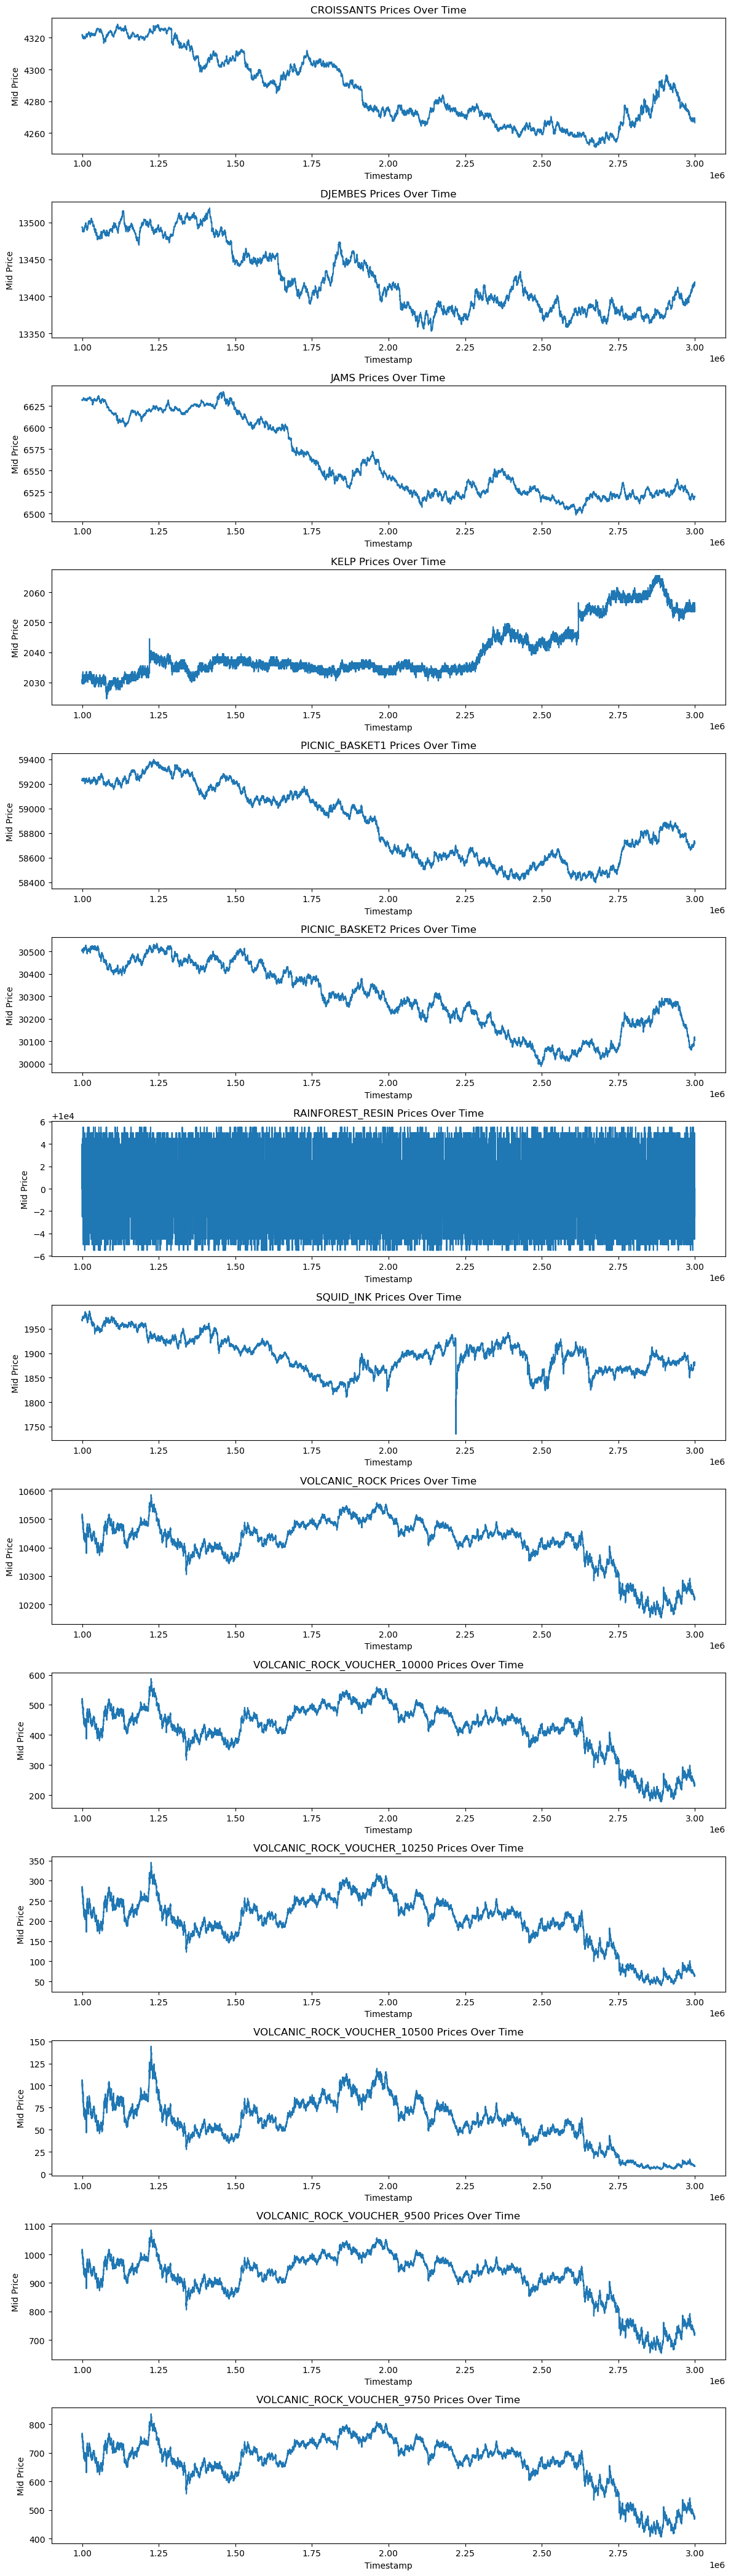

In [24]:
plt.figure(figsize=(12, len(products) * 3))

for idx, product in enumerate(products):
    plt.subplot(len(products), 1, idx + 1)
    sns.lineplot(
        data=data[data['product'] == product],
        x='timestamp',
        y='mid_price'
    )
    plt.title(f'{product} Prices Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Mid Price')

plt.tight_layout()
plt.show()